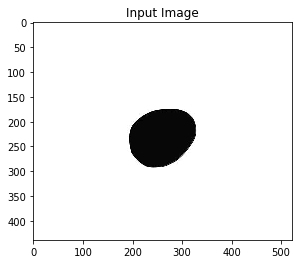

(439, 522, 3)


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology,feature

img = cv2.imread('test_001.png')
plt.imshow(img)
plt.title('Input Image')
plt.show()

print(img.shape)

In [30]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,gray_inv = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
distance = ndi.distance_transform_edt(gray_inv)
print(distance)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


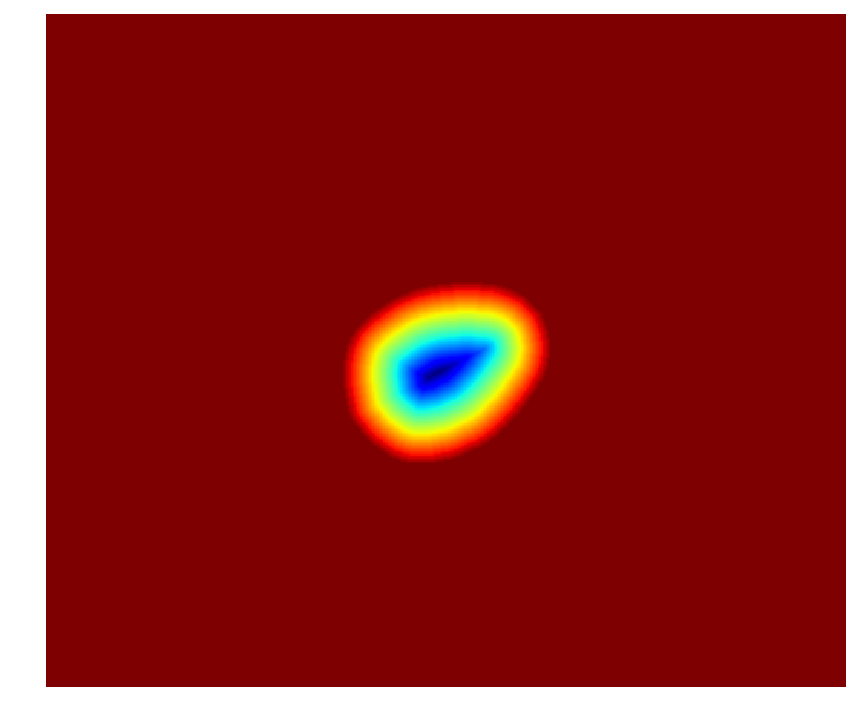

In [31]:
#local_maxi =feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                                   #labels=gray_inv)
#print(local_maxi)    
#markers = ndi.label(local_maxi)[0] 
#labels =morphology.watershed(-distance, markers, mask=gray_inv) 

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
#axes = axes.ravel()
#ax0, ax1 = axes

#ax0.imshow(gray_inv, cmap=plt.cm.gray, interpolation='nearest')
#ax0.set_title("Original")

my_dpi = 100
fig = plt.figure (figsize=(800/my_dpi,800/my_dpi),dpi=my_dpi)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)


plt.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
#plt.set_title("Distance Transform")
#plt.savefig('Wanted.png')
fig.savefig('out_001.png',dpi=my_dpi)